In [27]:
from PIL import Image
import IPython.display as display
from QKDResources.pyfiles.saquiz9_1 import createQuiz9_1
from QKDResources.pyfiles.saquiz9_2 import createQuiz9_2
from QKDResources.pyfiles.saquiz9_3 import createQuiz9_3
from QKDResources.pyfiles.saquiz10_1 import createQuiz10_1
from QKDResources.pyfiles.saquiz10_2 import createQuiz10_2

drive = "QKDResources/"

img1 = Image.open(drive + "images/03/nanomod9-fig1.png")
img2 = Image.open(drive + "images/03/nanomod9-fig2.png")
img3 = Image.open(drive + "images/03/nanomod9-fig3.png")
img4 = Image.open(drive + "images/03/nanomod9-fig4.png")
img5 = Image.open(drive + "images/03/nanomod9-fig5.png")

# 03 Quantum Basics

## Learning Goals

1. Students will understand the notion of probabilistic systems.
2. Students will be able to create probability vectors for probabilistic systems and apply simple operations on them.
3. Students will understand the notion of qubits and types of operations that can be applied to them.
4. Students will understand the notion of modeling light photons as qubits and determine some of their basic properties with respect to measurement.
5. Students will be able to model two level quantum systems using vector and ket representations.
6. Students will understand the notions qubit, amplitude and probability of collapse.
7. Students will understand the notion of superposition.
8. Students will be able to change between basis representations for a given qubit.

## 03.01: From Probabilistic Systems to Quantum Systems 

### 03.01.01: A Probabilistic Model

Since probability is at the heart of quantum mechanics, before diving into quantum mechanics it is helpful to first consider a classical probabilistic system. This is <b><i>not</i></b> to say that classical probabilistic systems are equivalent to quantum systems, but some analogies are helpful to start with.

Consider a physical system, called $S$, with some finite (non-empty set $\tau$) of possible states. For instance, $\tau=\{0, 1\}$, when the system $S$ represents a classical bit. Now assume that, for some reason, we do not exactly know what state $S$ is going to be in at any given moment. However, we do know what state it may probably be in. In other words, we know that at time $t$, $S$ may be in state 0 with probability $\frac{4}{5}$ and in state 1 with probability $\frac{1}{5}$.

It is common to represent this type of knowledge about state of $S$ with a <i>probability vector</i>, which is essentially a $2\times1$ vector with non-negative real numbers that sum to 1. In the above example, the associated probability vector for $S$ is, 

$$v = \begin{array}{c} \mathbf{0}\\ \mathbf{1}\\ \end{array}
\begin{bmatrix}\frac{4}{5}\\ \frac{1}{5}\end{bmatrix}$$

Here the bold numbers outside the vector represents the entry that is indexed by bit 0 and bit 1.

<b>An abstract notion:</b> This practice of using "positional notation" where depending on which row we put a (complex/real) number in, denotes an entirely new state, will be very useful and turnout to be a succinct way of representing a large number of quantum states.

### 03.01.02: "Looking at the state" (Measurement)

Of course, the uncertainity in the knowledge of state of $S$ only persists until we actually "look" at the system. Once we look at the system, we will know exactly what state the system is in. Therefore, looking at the state of $S$ changes our knowledge about its state. Consequently, if we look at the system described by vector $v$ and find that the system is in state 0, the description of our knowledge changes from $v$ to a new probability vector $w$:

$$ v=\begin{bmatrix}\frac{4}{5}\\ \frac{1}{5}\end{bmatrix}\rightarrow w=\begin{bmatrix}1\\0\end{bmatrix}$$

Vector $w$ just represents the fact that we know that system $S$ is in state 0. If instead of 0, we see a 1, the vector would be $\begin{bmatrix}0\\1\end{bmatrix}$.

### 03.01.03: Operations

Let's discuss what kind of operations can be performed on the system $S$. Our knowledge of the state of the system is given by the probability vector $v$. Since it's a two state system, we can perform the usual operations such as NOT or identity operations (which amounts to doing nothing). We will see that all pysically meaningful operations can be represented by a matrix and the effect of the operation can be determined by the matrix-vector multiplication. For instance, 
$$
\text{NOT} = \begin{bmatrix}0&1\\1&0\end{bmatrix}\text{   and   I} = \begin{bmatrix}1&0\\0&1\end{bmatrix}
$$
represent the NOT and identity operations, respectively. Applying the NOT operation to $v=\begin{bmatrix}\frac{4}{5}\\ \frac{1}{5}\end{bmatrix}$ we get,
$$
w=\text{NOT}\cdot v= \begin{bmatrix}0&1\\1&0\end{bmatrix}\cdot\begin{bmatrix}\frac{4}{5}\\ \frac{1}{5}\end{bmatrix} = \begin{bmatrix}\frac{1}{5}\\ \frac{4}{5}\end{bmatrix}
$$

This means that now the probabilities of finding the system in state 0 and state 1 are reversed. Remember, we still haven't looked at the system.

Further, we can also perform a NOT operation with a probability of $\frac{3}{4}$ and do nothing with probability $1-\frac{3}{4}=\frac{1}{4}$. This last probabilistic application of NOT can be represented by the following matrix.
$$
\text{NOT}_{prob} = \begin{bmatrix}\frac{1}{4}& \frac{3}{4}\\\frac{3}{4}& \frac{1}{4}\end{bmatrix}
$$

### 03.01.04: From Classical to Quantum

So far we've seen that the state of classical systems can be described using probability vectors, where the elements are real numbers in $[0,1]$. 

We'll see that quantum systems are also represented using vectors such as these but with three major differences:

1. The vectors are no longer just representing our "knowledge" of the state of the system, they <u>are</u> the system-state themselves.

2. The elements of the vector are no longer restricted to real numbers. They are complex numbers.

3. The elements of the vector representing the quantum states no longer add to 1 but their modulus squared does.

Following are some examples of valid quantum states,
$$
\begin{bmatrix}\frac{i}{\sqrt{2}}\\ \frac{1}{\sqrt{2}}\end{bmatrix},
\begin{bmatrix}\frac{2}{\sqrt{5}}\\ \frac{1}{\sqrt{5}}\end{bmatrix},
\begin{bmatrix}1\\0\end{bmatrix},
\begin{bmatrix}0\\1\end{bmatrix},
\begin{bmatrix}\frac{\sqrt{3}}{2}\\ \frac{i}{2}\end{bmatrix}
$$

One of the reasons that complex numbers are used is that probabilities based on real numbers can only increase. However, experimental evidence shows that sometimes quantum states "cancel" out each other. This is called "interference".

### 03.01.05: Probabilities and Unitary Matrices

Since our formulation for quantum states includes complex entries, it turns out that the condition it must satisfy is that the modulus squared of the entries add to 1. All the above examples satisfy this requirement.

With this requirement, the transition matrices need to be unitary matrices that will preserve the property that sum of modulus squared of the entries in a state vector is 1. Remember that a unitary matrix is a matrix $U$ such that $U\cdot \overline{U}^T=I$, where $\overline{U}^T$ is the complex conjugate transpose of $U$. It is common to write $\overline{U}^T$ as $U^\dagger$. Examples of unitary matrices include,

$$\begin{bmatrix}
\frac{1}{\sqrt{2}}&\frac{1}{\sqrt{2}}&0\\
\frac{-i}{\sqrt{2}}&\frac{i}{\sqrt{2}}&0\\
0&0&i
\end{bmatrix},
\begin{bmatrix}
0&-i\\
i&0
\end{bmatrix}, \text{ and }
\begin{bmatrix}
1&0\\
0&-1
\end{bmatrix}
$$

### 03.01.06: Going forwards and backwards in time

If we consider $U$ to be the matrix that changes the state of the system from time $t$ to $t+1$, then $U^\dagger$ takes it from $t$ to $t-1$. This makes quantum systems reversible.

### 03.01.07 The Classroom Experiment: A Polarized Photon

Photons exhibit quantum mechanical properties and enable most of quantum cryptography protocols and algorithms. Experiments with polarized photons can be done with ease, and low cost using a light source (say a laser pointer or a computer monitor screen) and three sheets of linearly polarizing filters (easily available on ebay/Amazon). This simple experiment directly leads to a formulation of the concept of a qubit and illustrates many interesting properties of quantum measurement. 

The experimental set up: Assuming you are using a laser pointer, shine the laser pointer at a screen and take a note of its intensity. Now place one of the polarizing filter sheets between the laser pointer and the screen as shown in figure 1. Assuming that the filter is vertically polarized as shown in the figure. You will see a dip in light intensity on the screen. This is because the polarizing filter filters out most of the photons and only allows the photons that are vertically polarized through it. Therefore, the photons that are hitting the screen are now vertically polarized. We will call the light intensity on the screen at this stage as bright.

<b>Figure 1.</b> Illustrates a unpolarized source of photons, a vertically polarizing filter and a screen. When the unpolarized photons hit the filter, only vertically polarized photons are allowed through and other polarizations are blocked. We consider the screen to be bright at this point.

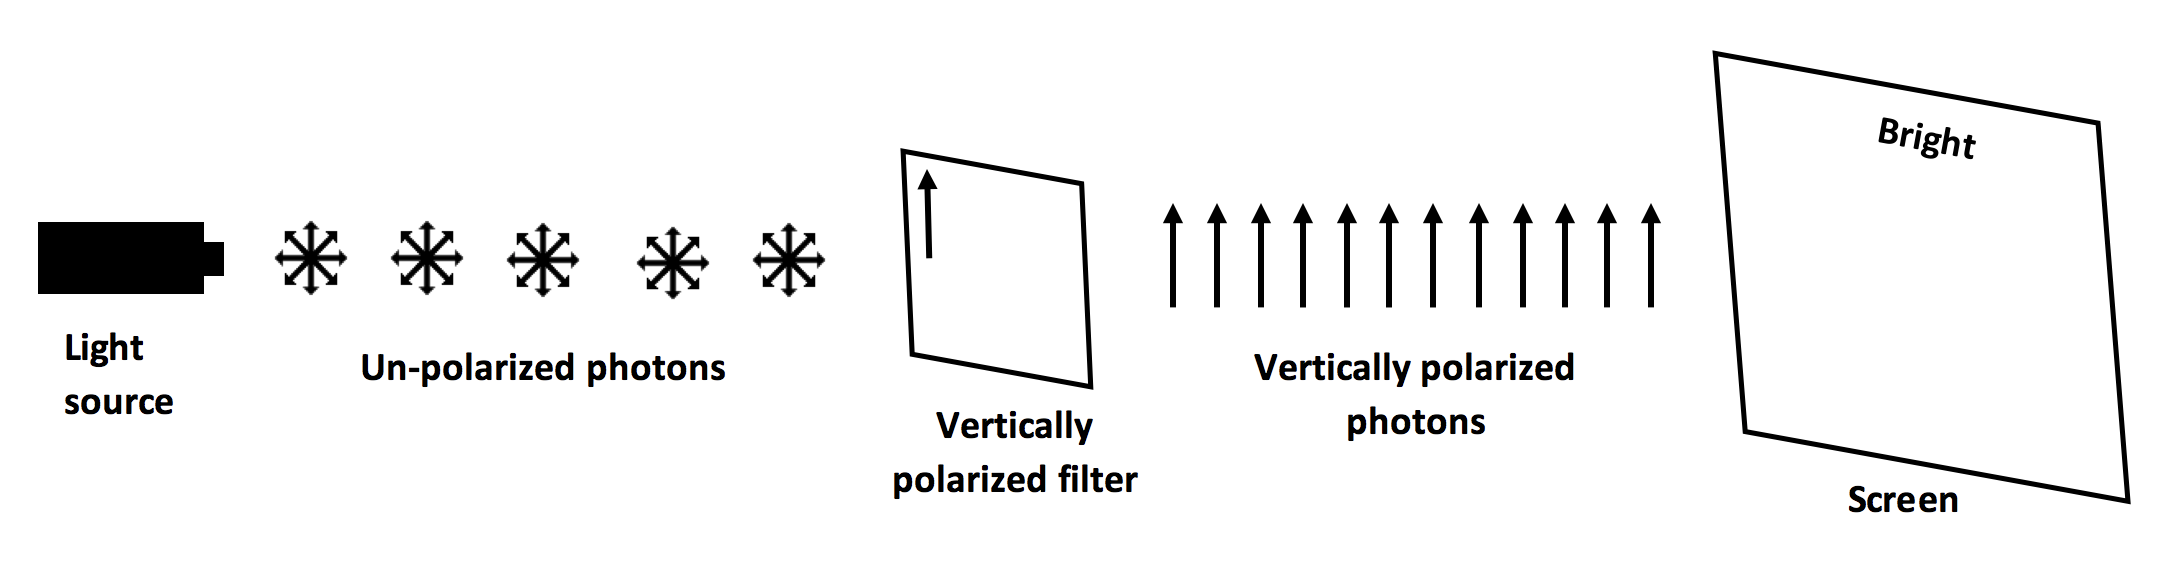

In [28]:
display.display(img1)

Now the fun starts! Place the second polarizing filter in front of the one that you just placed. However, make sure that this filter points horizontally. Therefore, the two polarizing filters are now orthogonal to each other. What do you think will happen to the amount of light you see on the screen?

<b>Figure 2.</b> Illustrates the effect of placing a second filter (horizontally polarized) between the first filter and the screen. The screen now goes dark because only vertically polarized photons hit the second filter and being orthogonal to the filter are not allowed through.

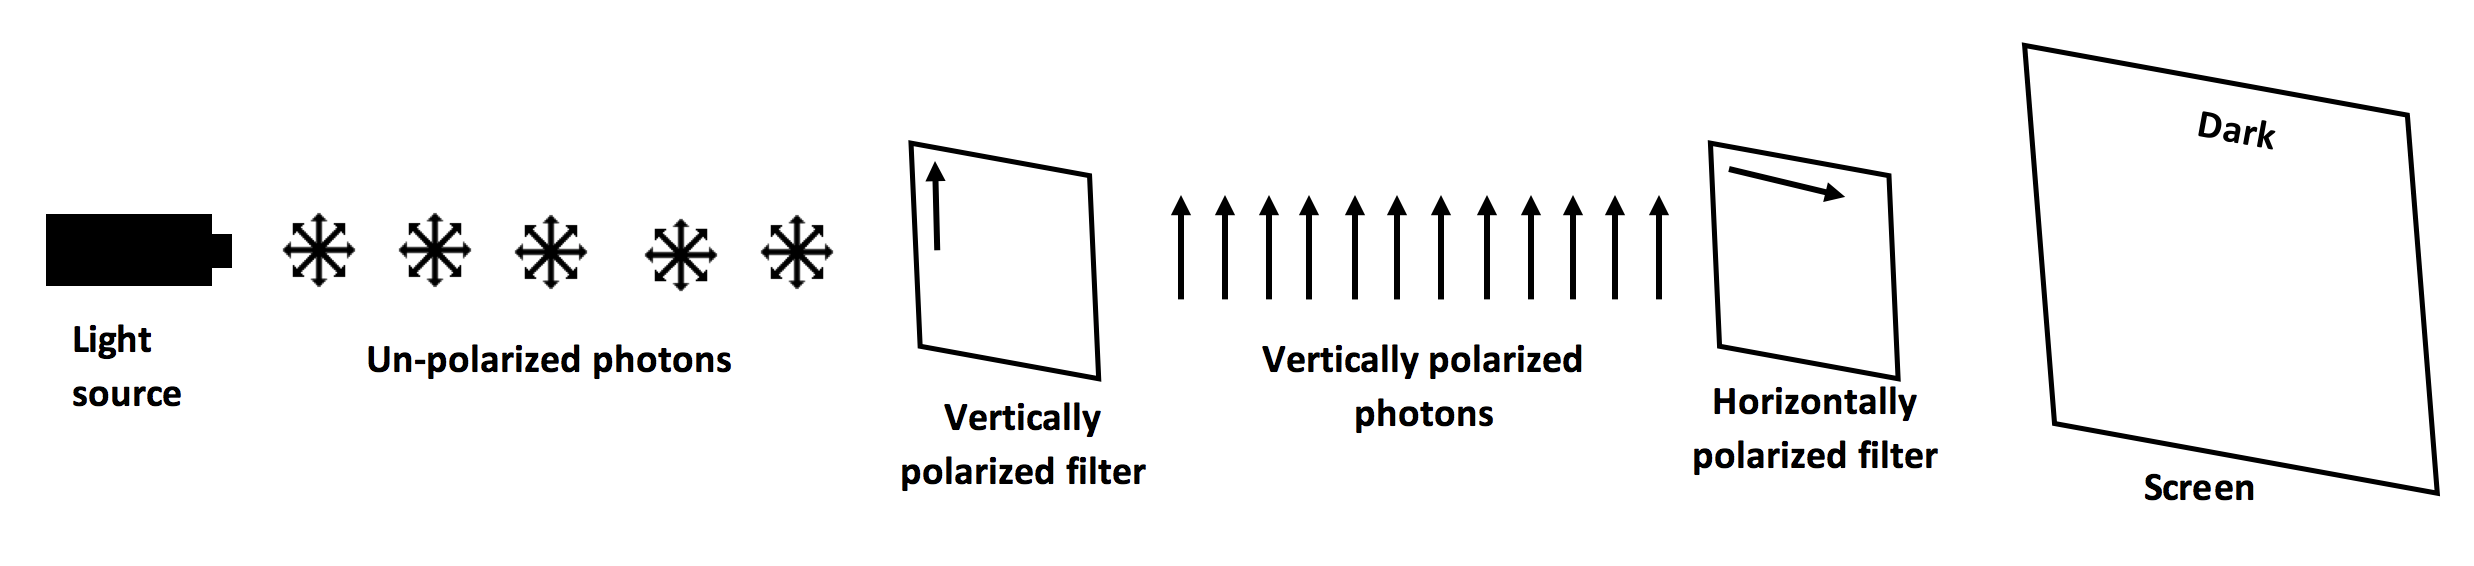

In [29]:
display.display(img2)

You should expect to see absolutely no light come through at all now. This is because after the first filter the only photons that are coming through are vertically polarized. When the vertically polarized photons hit the filter that is aligned horizontally, all the photons are blocked! Hence no light reaches the screen.

Now consider the third filter placed between the first and second filters as shown in figure 3. We’ve deliberately not drawn an arrow on the filter yet (for the direction of polarization).

<b>Figure 3.</b> Now we place a third filter between the vertically and horizontally polarized filter. We haven't chosen an angle of polarization for this new filter yet. Think of the different scenarios and their effect on the brightness of the screen.

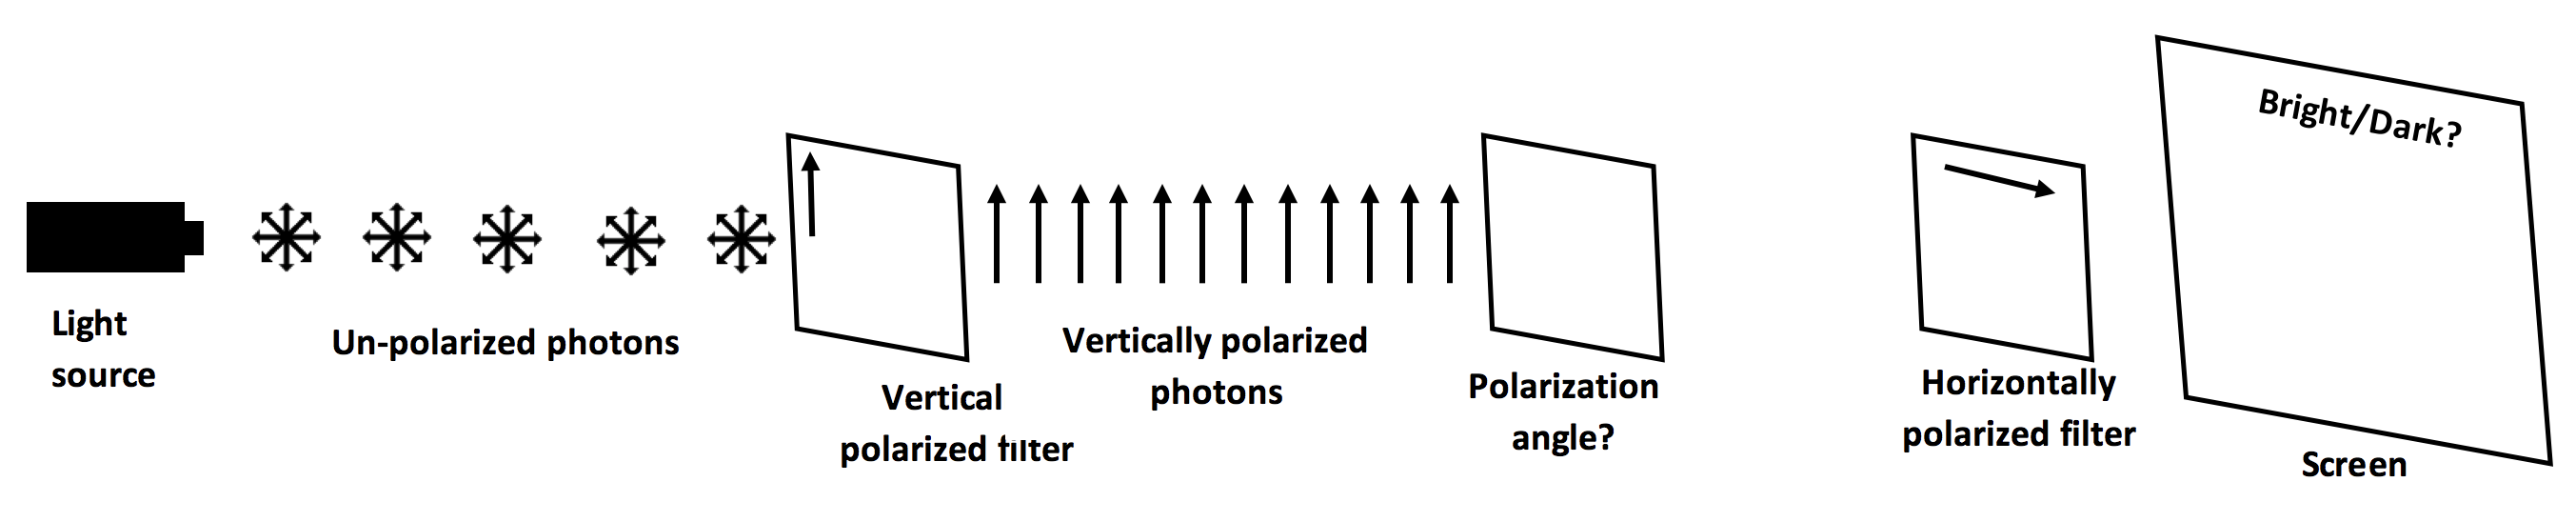

In [30]:
display.display(img3)

Think about the following scenarios.

1.	Filter three is pointing upwards (aligned with filter 1).
2.	Filter three is pointing horizontally (aligned with filter 2).
3.	Filter three is off axis at some angle $\theta$ with respect to the horizontal.

Can you estimate how much light should you see on the screen for each of these cases?

It is easy to see that when the third filter is aligned vertically or horizontally no light reaches the screen. However, it comes as a surprise that as we start rotating the third filter light starts to reach the screen! In fact, the spot on the screen keeps getting brighter and brighter until a certain angle $\theta$ and then starts to reduce again. This is shown in figure 4.

<b>Figure 4.</b> This figure illustrates the effect of assuming the new filter being polarized at $45^\circ$. For exaggerated effect we've shown the number of polarized photons reduce exactly by half at each step. Note that the photons emerging take on the polarization angle of the filter they just passed through. All previous polarization information is lost!

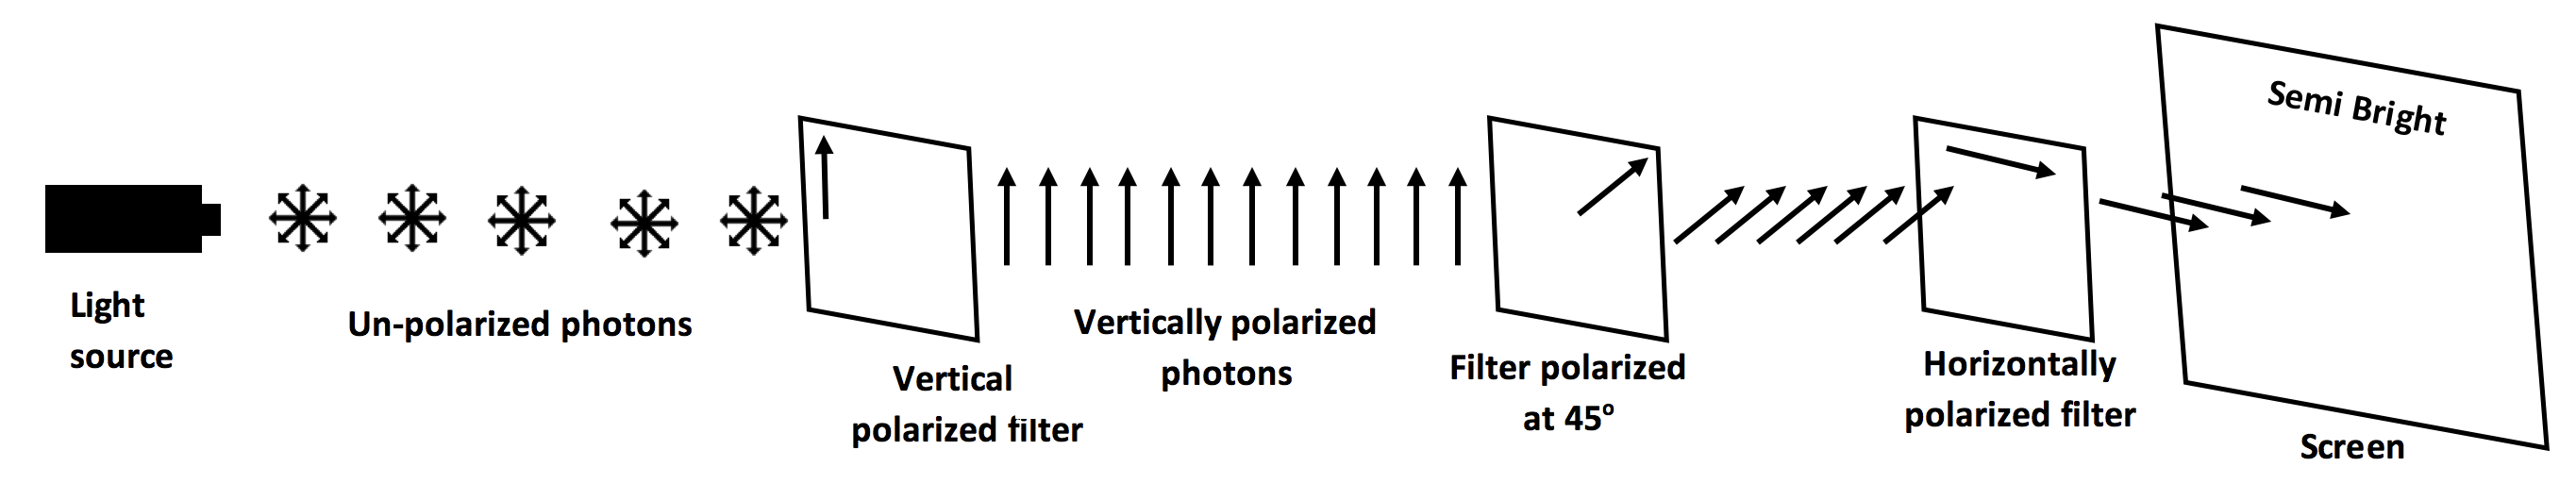

In [31]:
display.display(img4)

### 03.01.08: Quantum Theory at Work

The photon’s polarization state can be modelled using a unit vector and the direction in which the vector is pointed represents the polarization. We can conveniently write the vertical and horizontal polarizations using the notations: $\left|\uparrow\right>$ and $\left|\rightarrow\right>$, respectively. These are show in figure 5. 

<b>Figure 5.</b> This figure models the qubit (photon) in a two dimensional vector space. This modeling will be every useful throughout the course of our study.

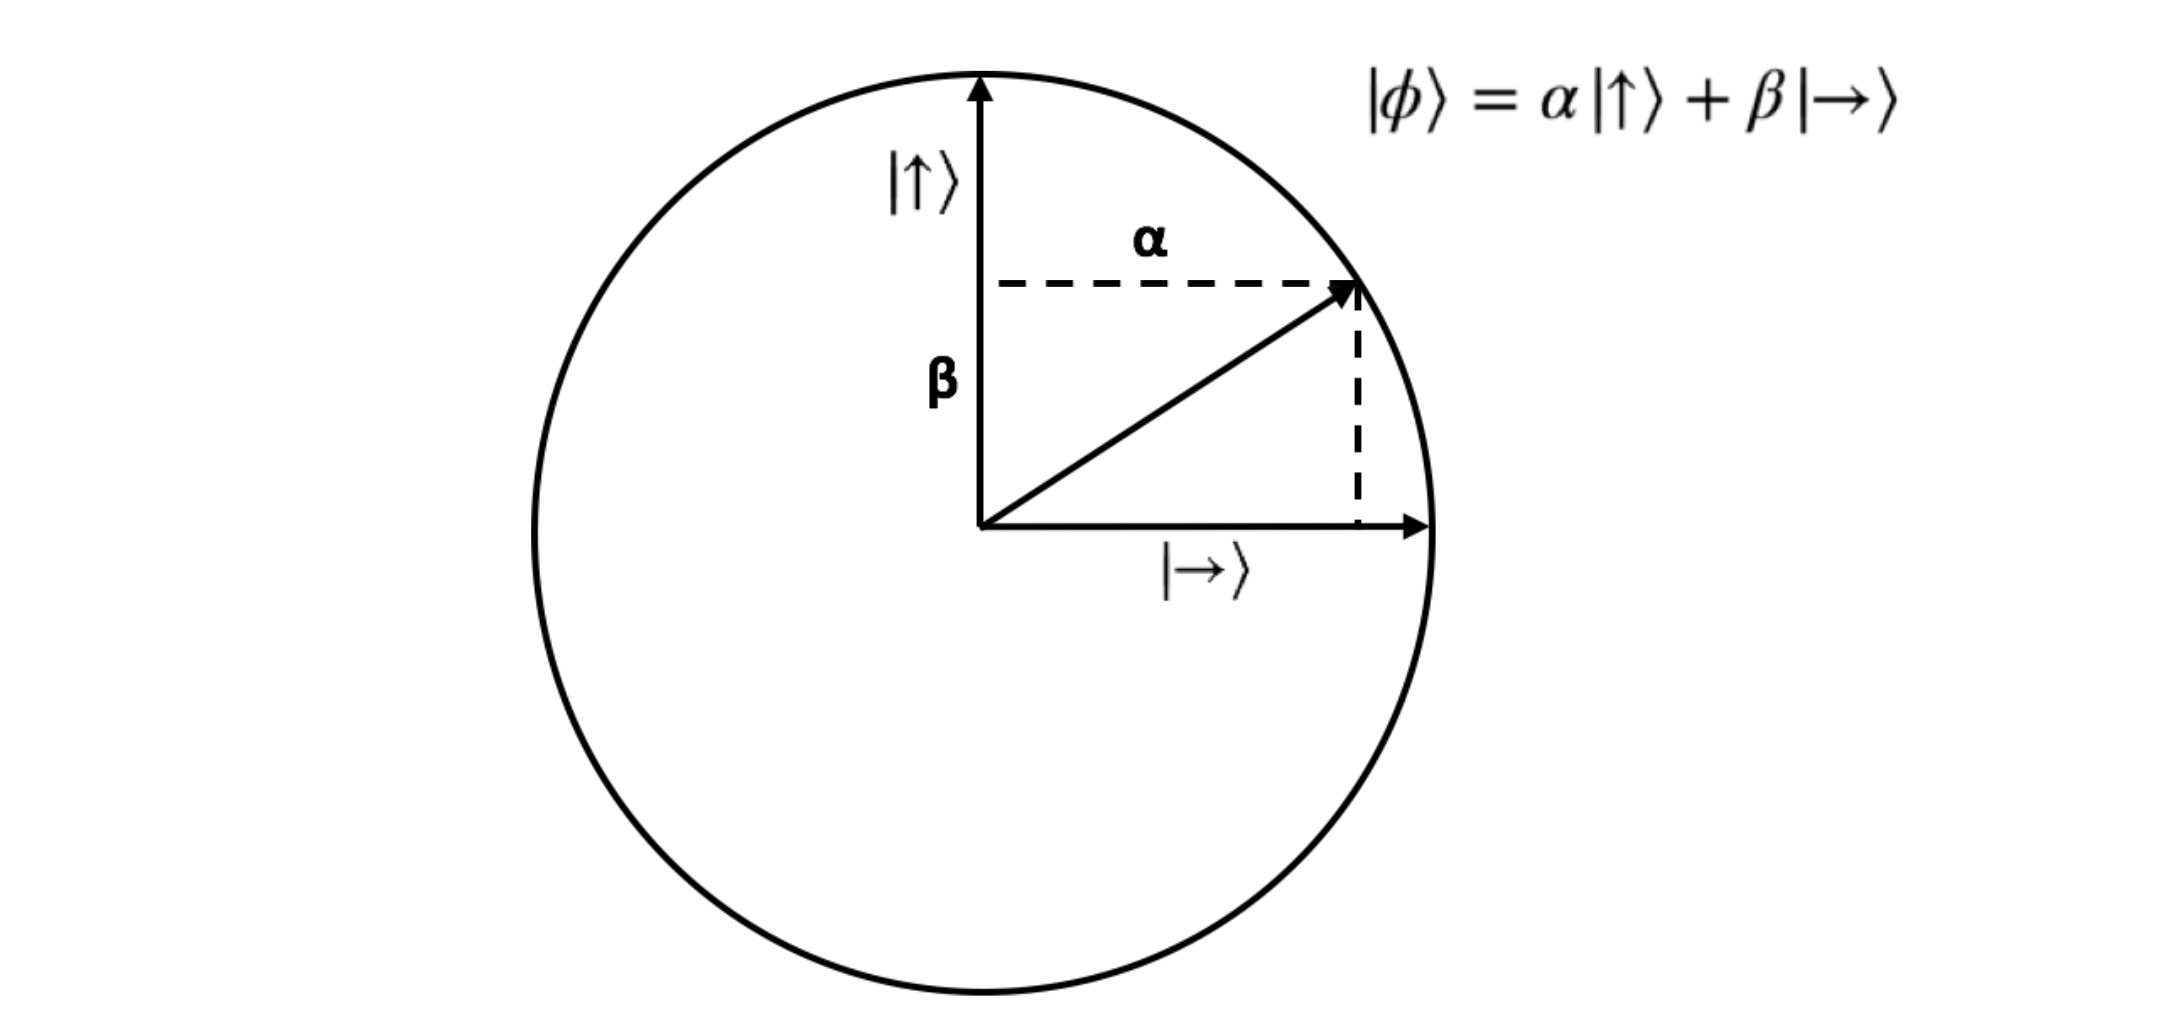

In [32]:
display.display(img5)


Now we can see that any other arbitrary polarization can be represented using a linear combination of these two basis states as follows: $\left|\phi\right>=\alpha\left|\uparrow\right>+\beta\left|\rightarrow\right>$. Further, we can see that $\alpha=cos\theta$ and $\beta=sin\theta$ for our purposes. Therefore, it is straightforward to compute the “quantum mechanical” representation of a photon polarized at $\theta$ degrees; other than $0^\circ$ (horizontal) and $90^\circ$ (verticle).

The coefficients $\alpha$ and $\beta$ are called the probability amplitudes or just amplitudes. The reason is that when a photon $\left|\phi\right>$ encounters, say, a horizontally polarizing filter then the probability that it will be transmitted is equal to $\left|\alpha\right|^2$. Similarly, when the photon encounters a vertically polarizing filter, then the probability that it will be transmitted is given by $\left|\beta\right|^2$. We take the modulus squared of the numbers here because in general the qubit can have complex amplitudes, but probabilities have to be positive. No one know why nature has chosen things to be this way but this is how they are!

You can read Scott Aaronson’s interesting theory behind why things are the way they are on his blog: https://www.scottaaronson.com/democritus/lec9.html

When $\alpha$ and $\beta$ are both non-zero we say that the photon is in the state of a <b><i>superposition</i></b>. And after measurement, the photon if it passes through takes on the new polarization irrespective of its previous state.

Going back to the light intensities on the screen. We see that the probability that a photon gets transmitted is given by the modulus squared of the angle it makes with the axis of the polarizing filter. It is easy to see that the transmission probability is maximized when the angle that incoming photon makes with the filter's axis of polarization is $45^\circ$. At this angle, half the photons get transmitted and half get blocked. Therefore, figure 4 reduces the number of transmitted photons by half after every filter. Although, in real life it is a probabilistic system and never quite so exact!


## 03.02: Basics of Quantum Computing/Cryptography

### 03.02.01: Classical Bits

We know that a <b>bit</b> describes a two-dimensional classical system. It has two values 0 and 1 and may be physically represented using a number of different phenomenons. For example, high and low voltage, direction of magnetic domains, etc. In other words, we are dealing with a system that has two possible states.

In the introductory nanomodule, a two state system is described using a $2\times1$ probability vector with positions representing different bit values. For example, the knowledge that a system is in state 0 can be written as $\begin{array}{c}
\mathbf{0}\\
\mathbf{1}\\
\end{array}
\begin{bmatrix}
1\\
0\\
\end{bmatrix}$ and that the system is in state 1 can be written as $\begin{array}{c}
\mathbf{0}\\
\mathbf{1}\\
\end{array}
\begin{bmatrix}
0\\
1\\
\end{bmatrix}$, where the digits in bold outside the matrices represents the position that is reponsible for that bit. In other words, the first row is reserved for bit 0 and second row is reserved for bit 1.

### 03.02.02: Qubits

Let's take a "quantum" leap and assume that system $S$ is a quantum state. Now the set of states $\tau=\{0,1\}$ refer to classical states and the $2\times1$ vectors representing our knowledge of the state of quantum system are no longer probability vectors but the vectors represent the state of the quantum system itself!

For example, following are a few examples of valid quantum states that we will see often: $\begin{bmatrix}1\\0\end{bmatrix}$, $\begin{bmatrix}0\\1\end{bmatrix}$, $\begin{bmatrix}\frac{1}{\sqrt{2}}\\\frac{1}{\sqrt{2}}\end{bmatrix}$, $\begin{bmatrix}\frac{1}{\sqrt{2}}\\-\frac{1}{\sqrt{2}}\end{bmatrix}$.

Therefore, a <b>qubit</b> is a unit of information describing a two dimentional quantum system. A general representation of a qubit is given by a $2\times1$ matrix with complex entries 
$\begin{bmatrix}
\alpha\\
\beta\\
\end{bmatrix}$.<br>
Here the complex numbers $\alpha$ and $\beta$ satisfy the relation $\rvert\alpha\rvert^2+\rvert\beta\rvert^2=1$, and $\alpha$ and $\beta$ are known as <b>probability amplitudes</b> or simply <b>amplitudes</b>. 

Therefore, a quantum system represents the classical bit 0 when $\alpha=1, \beta=0$ and the classical bit 1 when $\alpha=0, \beta=1$.

### 03.02.03: Ket Notation

Writing out matrices in sentence is quite unseemly. Therefore, we introduce a new notation called the Dirac's notation (Paul Dirac first used this notation in 1958). Bits 0 and 1 will then be written as $\left|0\right>$ and $\left|1\right>$, where $\left|0\right> = \begin{bmatrix}
1\\
0\\
\end{bmatrix}$ and $|1\rangle = \begin{bmatrix}
0\\
1\\
\end{bmatrix}$, respectively. These are called ket 0 and ket 1, respectively.

A general qubit is written as $\rvert\psi\rangle=\begin{bmatrix}\alpha\\\beta\end{bmatrix}$ and called ket $\psi$.

We will see that ket notation is quite useful in quantum theory and is more general than just writing bits 0 and 1. In fact, what sets quantum theory apart from classical theory is that in classical systems a bit can only be in state $\left|0\right>$ or state $\left|1\right>$ and never in both simultaneously. Whereas in a quantum system, a <b>quantum bit</b> (<i>qubit</i> for short) can be in both the states $\left|0\right>$ and $\left|1\right>$ simultaneously. When this happens, we say that the qubit is in superposition of $\left|0\right>$ and $\left|1\right>$.

### 03.02.04: Qubits and Measurement

We've seen that a general qubit is written as $\rvert\psi\rangle=\begin{bmatrix}
\alpha\\
\beta\\
\end{bmatrix}$, where $\alpha$ and $\beta$ are probability amplitudes. Given the condition $\rvert\alpha\rvert^2+\rvert\beta\rvert^2=1$, the probability of finding a quantum state, upon measurement, in state $\rvert0\rangle$ is $\rvert\alpha\rvert^2$ and the probability of finding a quantum system in state $\rvert1\rangle$ is $\rvert\beta\rvert^2$. Further, once a quantum state is "measured" it becomes a classical bit with values 0 or 1 with probabilities $\rvert\alpha\rvert^2$ and $\rvert\beta\rvert^2$, respectively. As a result, we can never "see" a general qubit or extract more information than one bit out of it! (Yes, nature is quite cruel in this way!)

Therefore, we say that a quantum state <b>collapses</b> to 0 or 1 upon measurement. We do, however, know precisely the probabilities of seeing a 0 or a 1.

### 03.02.05: Linear Combination and Example

It is easy to see that the state $\left|\psi\right>$ can be written in terms of linear combination of states $\left|0\right>$ and $\left|1\right>$ as follows,

$$\begin{bmatrix}
\alpha\\
\beta\\
\end{bmatrix} = \alpha\cdot
\begin{bmatrix}
1\\
0\\
\end{bmatrix} + \beta\cdot
\begin{bmatrix}
0\\
1\\
\end{bmatrix} = \alpha\left|0\right> +\beta\left|1\right>
$$

Clearly, $\left|0\right>$ and $\left|1\right>$ form a canonical basis of two dimensional complex vector space $\mathbb{C}^2$.

<b>Example:</b> So far we've seen two examples of a qubit $\left|0\right>$ and $\left|1\right>$. Another example would be $\left|+\right>$, which is a special symbol used to represent state $\begin{bmatrix}
\frac{1}{\sqrt{2}}\\
\frac{1}{\sqrt{2}}\\
\end{bmatrix}$. Upon measurement, the probability that $\left|+\right>$ collapses to $\left|0\right>$ or $\left|1\right>$ is $\frac{1}{2}=(\frac{1}{\sqrt{2}})^2=\rvert\alpha\rvert^2=\rvert\beta\rvert^2$.

### 03.02.06: Superposition

A central concept and a major departure from classical thinking and modeling of the systems is that the state vector in quantum systems should not be interpreted as our "lack" of knowledge of the state of the system. In fact, if we say that a quantum system is in state $\begin{bmatrix}\frac{1}{\sqrt{2}}\\ \frac{1}{\sqrt{2}}\end{bmatrix}$ then the system is simultaneously in both states $\left|0\right>$ and $\left|1\right>$! Therefore, we say that the system is in superposition.

This is quite different from saying that the system is in state $\left|0\right>$ with probability $\frac{1}{2}$ and in state $\left|1\right>$ with probability $\frac{1}{2}$. Now when we actually measure a quantum state then it will collapse to one of the two basis states with equal probability, which in this case are $\left|0\right>$ and $\left|1\right>$. But before the measurement has taken place, it is in both the states simultaneously.

Therefore, we say that qubit $\rvert\psi\rangle=\alpha\rvert0\rangle+\beta\rvert1\rangle$ is in superposition if both $\alpha$ and $\beta$ are non-zero.

### 03.02.07: Basis

In general when we say that a vector $\rvert\psi\rangle$ can be represented as a linear combination of vectors $\rvert b_1\rangle$, $\rvert b_2\rangle$, $\ldots$, $\rvert b_n\rangle$, we mean that there exists some complex coefficients $c_i$ such that $\rvert\psi\rangle=c_1\rvert b_1\rangle+c_2\rvert b_2\rangle+\ldots+c_n\rvert b_n\rangle$.

The set of vectors $B$ is said to be a basis set if every element in the complex vector space defined by $B$ can be represented as a complex linear combination of the vectors in $B$, uniquely. Therefore, in a two-dimensional vector space any two vectors that cannot be written as multiples of each other form a basis. Typically, in quantum mechanics, we will want to use only orthonormal basis. The two vectors $\{\rvert0\rangle, \rvert1\rangle\}$ represent one such basis.

In order to determine if two vectors are orthogonal to each other we simply check if their inner product is zero. Recall that the inner product for complex vectors $v_1$ and $v_2$ is defined as the $v_1^\dagger\cdot v_2$. In Dirac's notation, we write $\langle\psi\rvert$ to represent a dagger operation on the complex vector. This is called the bra notation and the inner product of two complex vectors representing two qubit state $\rvert\psi\rangle$ and $\rvert\phi\rangle$ can be written as $\langle\psi\rvert\rvert\phi\rangle$. Since we are lazy we drop the double lines in the middle and write $\left<\psi\rvert\phi\right>$.

Now back to the problem at hand! We say that two states are orthogonal to each other if the inner product of the complex vectors representing these states is zero, i.e. $\left<\psi\rvert\phi\right>=0$. Further if in addition the norm of the vectors $\rvert\rvert\psi\rangle\rvert=\sqrt{\left<\psi\rvert\psi\right>}=1$ and $\rvert\rvert\phi\rangle\rvert=1$ then we say that the two vectors are orthonormal.

#### Some Inner Products
Consider a qubit $\left|\psi\right>=\alpha\left|0\right>+\beta\left|1\right>$. The following inner products hold: $\left<0\rvert\psi\right>=\alpha$ and $\left<1\rvert\psi\right>=\beta$. Further, $\left<0\rvert0\right>=1$ and $\left<1\rvert1\right>=1$ and $\left<0\rvert1\right>=0$ and $\left<1\rvert0\right>=0$.

(Note that Dirac's bra-ket notation is a funny way of saying bracket because when you put bra and ket together it forms a bracket!)

### 03.02.07: Superposition or Not Superposition!

Note that for us to meaningfully say something is in superposition, we must specify basis. For example, when we say that states $\rvert+\rangle=\frac{1}{\sqrt{2}}\begin{bmatrix}1\\1\end{bmatrix}$ and $\rvert-\rangle=\frac{1}{\sqrt{2}}\begin{bmatrix}1\\-1\end{bmatrix}$ are in superposition we generally mean with respect to the standard basis $\{\rvert0\rangle,\rvert1\rangle\}$.

However, we can choose a new basis $\{\rvert+\rangle, \rvert-\rangle\}$ and the two states above are no longer in superposition with respect to this new basis! This basis is also called the Hadamard basis or the diagonal basis. In fact, with respect to this new basis, states $\rvert0\rangle$ and $\rvert1\rangle$ are in superposition. This is shown below,
\begin{aligned}
\rvert0\rangle &= \frac{1}{\sqrt{2}}(\rvert+\rangle+\rvert-\rangle) \text{ and} \\
\rvert1\rangle &= \frac{1}{\sqrt{2}}(\rvert+\rangle-\rvert-\rangle) \\
\end{aligned}

# 03 Quizzes

## Q03.01

<b>Fill in the blanks:</b>

1. If a two state system has $\frac{3}{4}$ probability of being in state 0 then we can represent this with a probability vector __________________.

2. If I "look" at a two state system and find it in state 1, then my knowledge of the state of the system is given by ________________.

3. Consider a system that can be in states 1, 2 and 3. We know that at time $t$ the system may be in state 1 with probability $\frac{1}{4}$, in state 2 with probability $\frac{1}{2}$ and in state 3 with probability $\frac{1}{4}$. The probability vector representing our system can be written as ____________________________.

4. If we "look" at a three state system and find it in state 2, then the probability vector representing our knowledge is given by __________________________________.

In [33]:
createQuiz9_1()

HTMLMath(value='<font size="+0">&emsp;1. If a two state system has $\\frac{3}{4}$ probability of being in stat…

HTMLMath(value='<font size="+0">&emsp;2. If I "look" at a two state system and find it in state 1, then my kno…

HTMLMath(value='<font size="+0">&emsp;3. Consider a system that can be in states 1, 2 and 3. We know that at t…

HTMLMath(value='<font size="+0">&emsp;4. If we "look" at a three state system and find it in state 2, then the…

## Q03.02

1. When quantum system states are represented using vectors, what are the elements of such a vector: complex numbers, real numbers or integers?

2. What type of matrices are valid operators for a quantum system?

3. Are quantum systems reversible? Why?

In [34]:
createQuiz9_2()

HTMLMath(value='<font size="+0">&emsp;1. When quantum system states are represented using vectors, what are th…

HTMLMath(value='<font size="+0">&emsp;2. What type of matrices are valid operators for a quantum system?')

HTMLMath(value='<font size="+0">&emsp;3. Are quantum systems reversible? Why?')

## Q03.03

What angle should the middle filter be polarized at so that the screen is:

1. The brightest.
2. About $\frac{1}{3}$ bright.

In [35]:
createQuiz9_3()

HTMLMath(value='<font size="+0">&emsp;1. The brightest.')

HTMLMath(value='<font size="+0">&emsp;2. About $\\frac{1}{3}$ bright.')

## Q03.04

1. Which of the following are examples of valid qubits?

    a. $\rvert-\rangle=\frac{1}{\sqrt{2}}(\rvert0\rangle-\rvert1\rangle)$
    
    b. $\frac{1}{\sqrt{2}}\rvert0\rangle-\frac{1+i}{2}\rvert1\rangle$
    
    c. $\frac{1+i}{3}\rvert0\rangle-\frac{1-i}{2}\rvert1\rangle$
    
    d. $\frac{i}{10}\rvert0\rangle+\frac{99}{10}\rvert1\rangle$
    
    e. $\frac{\sqrt{3}}{2}\rvert0\rangle+\frac{1}{3}\rvert1\rangle$
    
    f. $\frac{i}{\sqrt{2}}(\rvert0\rangle+\rvert1\rangle)$
    
    g. $\frac{1}{\sqrt{2}}(\rvert0\rangle+e^{\frac{i\pi}{2}}\rvert1\rangle)$
    
    h. $\frac{1}{2}\rvert0\rangle-\frac{i}{2}\rvert1\rangle$
    
    i. $\frac{\sqrt{3}}{2}\rvert0\rangle+\frac{1}{4}\rvert1\rangle$
    
    j. $e^{i\pi}\rvert-\rangle$
<br>

2. For the expressions in question 1 that are not valid qubits, re-normalize the coefficients to convert them into valid qubits.   

In [36]:
createQuiz10_1()

HTMLMath(value='<b><font size="+2">Exercise 2')

HTMLMath(value='<font size="+1">For each non-valid qubit, re-normalize the coefficients to convert them into v…

Label(value='')

## Q03.05

1. Which of the following qubits are in superposition with respect to the standard basis? 

    a. $\frac{1}{\sqrt{2}}(-\rvert0\rangle+i\rvert1\rangle)$
    
    b. $\frac{1}{2}\rvert+\rangle+\frac{\sqrt{3}}{2}\rvert-\rangle$
    
    c. $\rvert-\rangle$
    
    d. $\frac{1}{\sqrt{2}}\rvert0\rangle-\frac{e^{i\pi}}{\sqrt{2}}\rvert1\rangle$
    
    e. $-\rvert1\rangle$
    
    f. $\frac{1+i}{2}\rvert+\rangle+\frac{1-i}{2}\rvert-\rangle$
    
    g. $\frac{1+i}{2}\rvert1\rangle-\frac{1-i}{2}\rvert0\rangle$
<br><br>   
2. For the qubits that are in superposition with respect to standard basis, give a basis with respect to which they are not in superposition.

In [37]:
createQuiz10_2()

HTMLMath(value='<b><font size="+2">Exercise 2')

HTMLMath(value='<font size="+1">For the qubits that are in superposition with respect to standard basis, give …

Label(value='')